<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

---
* Classification is a procedure of arranging a given arrangement of information into classes, It can be performed on both organized or unstructured information. 
*  The procedure begins with predicting the class of given information focuses. The classes are frequently alluded to as **($y$)target, label, or classifications.** 
* Classification tasks is used to seperate the two category or define the boundary to seperate the groups.
  ![](https://whataftercollege.com/wp-content/uploads/2020/05/Classification-of-Machine-Learning.jpg)

**Example**
---
  ![](https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationExample.png)



![](https://miro.medium.com/max/2554/1*KwoCU9zbIAu530NAZQQQaw.jpeg)

# Linear and No-Linear Algorithms
![](https://ars.els-cdn.com/content/image/3-s2.0-B9780128167182000166-gr001.jpg)

![](https://qph.fs.quoracdn.net/main-qimg-ef5ecbb3c237e3f52669db67531778ea)

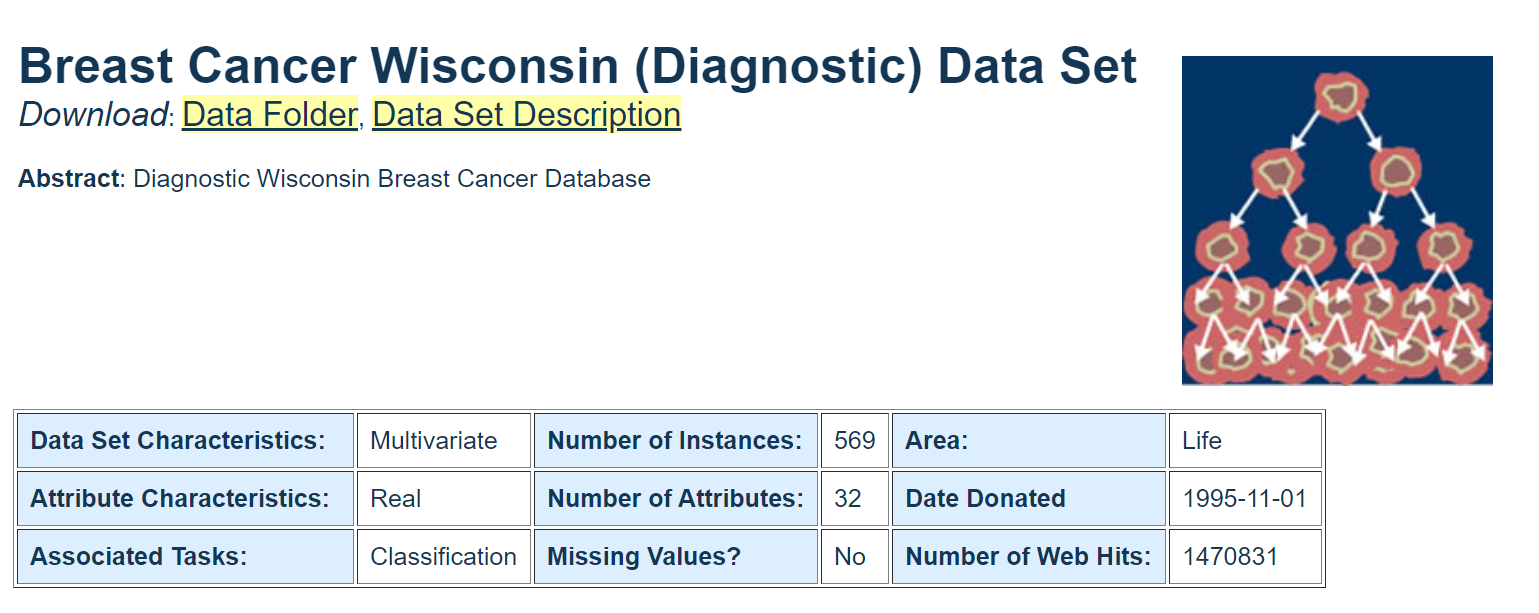

Attribute Information:

1) ID number  
2) Diagnosis (M = malignant, B = benign)  
3-32)  

Ten real-valued features are computed for each cell nucleus:  

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  



Dataset : [Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### step-1: Importing dataset class

In [4]:
from sklearn.datasets import load_breast_cancer

### step-2: Creating dataset object

In [5]:
dataset = load_breast_cancer()

### step-3: target variable

In [6]:
target = dataset.target
print('Target values :', target)

Target values : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 

### step-4: Creating feature dataframe

In [7]:
feature_df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
feature_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step-5 Analysis Target Variable Frequency

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


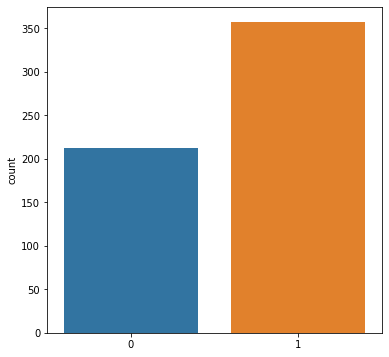

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(target)
plt.show()

### Step-6 Scale the data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(feature_df)
X.shape

(569, 30)

### Step-7 Splitting data into train test split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### Step-8 Logistic Regression

In [15]:
%%time
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

CPU times: user 19.9 ms, sys: 13.5 ms, total: 33.3 ms
Wall time: 23.3 ms


### Step-9 Model Evaluation

In [28]:
%%time 
from sklearn.metrics import f1_score

y_preds = log_reg.predict(X_test)
f1_log_reg = f1_score(y_test, y_preds)
print('F1 score (logistic regression) =', f1_log_reg)

F1 score (logistic regression) = 0.979020979020979
CPU times: user 3.8 ms, sys: 1.13 ms, total: 4.93 ms
Wall time: 7.43 ms


### Step-10 Classification Report and Confusion Matrix

In [32]:
from sklearn.metrics import classification_report, confusion_matrix,  cohen_kappa_score, accuracy_score

In [33]:
print("Classification Report : \n",classification_report(y_test, y_preds))
print("Accuracy :", accuracy_score(y_test, y_preds) * 100)
print("Cohen Kappa :", cohen_kappa_score(y_test, y_preds))

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy : 97.36842105263158
Cohen Kappa : 0.9437314906219151


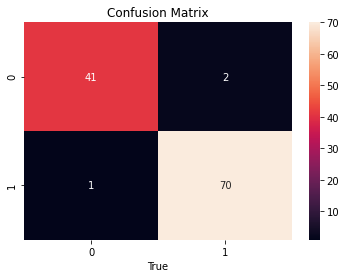

In [34]:
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicte")
plt.xlabel("True")
plt.title("Confusion Matrix")
plt.show()